In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import files
files.upload()  # Upload kaggle.json from your Kaggle account


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aasiasalahuddin","key":"ce88831f2f968804e69d620212e8e399"}'}

In [4]:
# Step 2: Set up Kaggle API
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 3: Download dataset
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

# Step 4: Unzip the dataset
!unzip customer-segmentation-tutorial-in-python.zip -d customer-segmentation


mv: cannot stat 'kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
License(s): other
  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 3.62MB/s]
Archive:  customer-segmentation-tutorial-in-python.zip
  inflating: customer-segmentation/Mall_Customers.csv  


In [5]:
import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import seaborn as sns

In [7]:
# STEP 2: Load Data
df = pd.read_csv('customer-segmentation/Mall_Customers.csv')
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [8]:
# STEP 3: Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


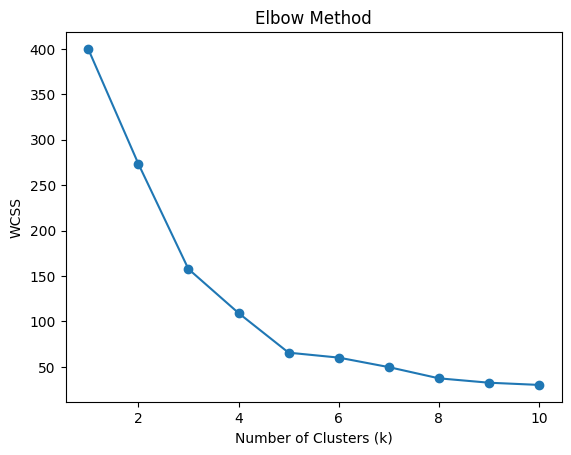

In [9]:
# STEP 4: Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# STEP 5: Elbow method to find optimal K
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [10]:
# STEP 6: KMeans with optimal k (choose 5 based on elbow)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

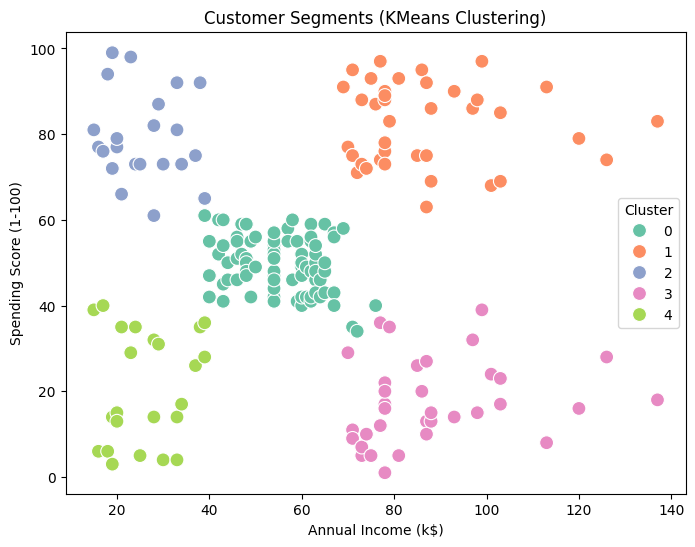

In [11]:
# STEP 7: Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segments (KMeans Clustering)')
plt.show()


In [12]:
# STEP 8: Average spending per cluster
avg_spending = df.groupby('Cluster')['Spending Score (1-100)'].mean().reset_index()
print("\nAverage Spending Score per Cluster:\n", avg_spending)



Average Spending Score per Cluster:
    Cluster  Spending Score (1-100)
0        0               49.518519
1        1               82.128205
2        2               79.363636
3        3               17.114286
4        4               20.913043


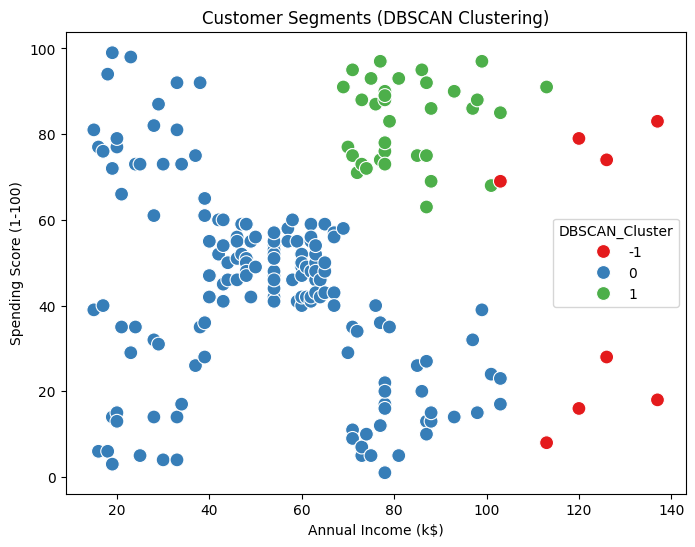

In [13]:
# BONUS: Try DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Cluster', palette='Set1', s=100)
plt.title('Customer Segments (DBSCAN Clustering)')
plt.show()